# Projet Data  Analyse d’animés

## Contexte
Une plateforme de streaming d’animés souhaite identifier rapidement
des animés à forte valeur éditoriale à partir de données limitées.

## Objectif
Construire un score simple permettant de mettre en avant
des animés de qualité de manière fiable.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv("animes.csv")
df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [40]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              61 non-null     str    
 1   Genre_Tags         61 non-null     str    
 2   Source             61 non-null     str    
 3   Nb_Episodes        61 non-null     int64  
 4   Status             61 non-null     str    
 5   Studio             61 non-null     str    
 6   Date_Pub           61 non-null     str    
 7   Note_Globale       61 non-null     float64
 8   Note_Meilleur_Ep   61 non-null     float64
 9   Meilleur_Ep_Titre  61 non-null     str    
 10  Comm_Meilleur_Ep   61 non-null     str    
 11  Note_Pire_Ep       61 non-null     float64
 12  Pire_Ep_Titre      61 non-null     str    
 13  Comm_Pire_Ep       61 non-null     str    
 14  Comm_Saison_1      61 non-null     str    
 15  Comm_Saison_2      61 non-null     str    
 16  Comm_Saison_3      51 non-null     str 

In [41]:
df.isna().sum()

Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

In [42]:
df = df.drop_duplicates()

## Nettoyage des données

Les données ne présentent pas de valeurs manquantes
dans les variables clés utilisées pour l’analyse.
Les doublons ont été vérifiés .
Les valeurs manquantes restantes concernent uniquement
des colonnes de commentaires, non utilisées dans le score.

In [43]:
df["ecart"] = df["Note_Meilleur_Ep"] - df["Note_Pire_Ep"]
df[["Anime", "Note_Meilleur_Ep", "Note_Pire_Ep","ecart"]]

,Anime,Note_Meilleur_Ep,Note_Pire_Ep,ecart
0,Naruto,9.6,5.8,3.8
1,Trigun,9.1,6.5,2.6
2,Dragon Ball Z,9.4,5.9,3.5
3,Fullmetal Alchemist: Brotherhood,9.6,6.3,3.3
4,Cowboy Bebop,9.7,7.2,2.5
5,Sword Art Online,8.9,5.9,3.0
6,Re:Zero,9.8,7.6,2.2
7,Dr. Stone,9.1,7.1,2.0
8,One Piece,9.8,5.6,4.2
9,Blue Lock,9.3,6.0,3.3


In [44]:
df["regularite"] = 10 - df["ecart"]
df[["Anime" ,"ecart" ,"regularite"]]

,Anime,ecart,regularite
0,Naruto,3.8,6.2
1,Trigun,2.6,7.4
2,Dragon Ball Z,3.5,6.5
3,Fullmetal Alchemist: Brotherhood,3.3,6.7
4,Cowboy Bebop,2.5,7.5
5,Sword Art Online,3.0,7.0
6,Re:Zero,2.2,7.8
7,Dr. Stone,2.0,8.0
8,One Piece,4.2,5.8
9,Blue Lock,3.3,6.7


In [45]:
df["score_qualite"] = 0.6 * df["Note_Globale"] + 0.4 * df["regularite"]
df[["Anime" ,"Note_Globale","regularite" ,"score_qualite" ]].head()

,Anime,Note_Globale,regularite,score_qualite
0,Naruto,8.4,6.2,7.52
1,Trigun,8.2,7.4,7.88
2,Dragon Ball Z,8.7,6.5,7.82
3,Fullmetal Alchemist: Brotherhood,9.1,6.7,8.14
4,Cowboy Bebop,8.8,7.5,8.28


In [46]:
df.sort_values("score_qualite", ascending = False)[
    ["Anime" ,"Note_Globale" ,"regularite" ,"score_qualite"]
].head(10)


,Anime,Note_Globale,regularite,score_qualite
35,Frieren: Beyond Journey's End,9.3,7.9,8.74
43,Your Lie in April,8.6,8.9,8.72
21,Steins;Gate,9.1,8.1,8.70
53,Vinland Saga,8.8,8.5,8.68
31,Mushishi,8.7,8.6,8.66
44,Monster,8.9,8.3,8.66
52,Chainsaw Man,8.4,9.0,8.64
13,Les Carnets de l'apothicaire,8.8,8.4,8.64
45,Hajime no Ippo,8.8,8.3,8.60
15,Du mouvement de la Terre,8.4,8.9,8.60


In [47]:
top_note = df.sort_values("Note_Globale",ascending=False)[
    ["Anime" ,"Note_Globale" ,"regularite"]
].head(10)
top_score = df.sort_values("score_qualite",ascending=False)[
    ["Anime" ,"regularite" ,"Note_Globale" , "score_qualite" ,]
].head(10)
top_note,top_score

(                               Anime  Note_Globale  regularite
 35     Frieren: Beyond Journey's End           9.3         7.9
 21                       Steins;Gate           9.1         8.1
 3   Fullmetal Alchemist: Brotherhood           9.1         6.7
 19            Hunter x Hunter (2011)           9.0         6.2
 44                           Monster           8.9         8.3
 4                       Cowboy Bebop           8.8         7.5
 13      Les Carnets de l'apothicaire           8.8         8.4
 45                    Hajime no Ippo           8.8         8.3
 53                      Vinland Saga           8.8         8.5
 10                         Haikyuu!!           8.7         7.6,
                             Anime  regularite  Note_Globale  score_qualite
 35  Frieren: Beyond Journey's End         7.9           9.3           8.74
 43              Your Lie in April         8.9           8.6           8.72
 21                    Steins;Gate         8.1           9.1       

## hypothèses

La comparaison entre le classement basé uniquement sur la note globale
et celui basé sur le score qualité montre des différences notables.

Cela confirme que la régularité des épisodes est un facteur clé
pour identifier des animés à forte valeur éditoriale et réduire
le risque de mise en avant de contenus inégaux.


In [50]:
def categorie_editoriale(row):
    if row["score_qualite"] >= 8.5 and row["regularite"] >= 8:
        return "Chef-d'œuvre"
    elif row["score_qualite"] >= 8 and row["regularite"] < 8:
        return "Très bon mais inégal"
    elif row["score_qualite"] < 8 and row["regularite"] >= 7:
        return "Risqué"
    else:
        return "À éviter"

df["Categorie_Editoriale"] = df.apply(categorie_editoriale, axis=1)

df[["Anime", "Note_Globale", "regularite", "score_qualite", "Categorie_Editoriale"]]


,Anime,Note_Globale,regularite,score_qualite,Categorie_Editoriale
0,Naruto,8.4,6.2,7.52,À éviter
1,Trigun,8.2,7.4,7.88,Risqué
2,Dragon Ball Z,8.7,6.5,7.82,À éviter
3,Fullmetal Alchemist: Brotherhood,9.1,6.7,8.14,Très bon mais inégal
4,Cowboy Bebop,8.8,7.5,8.28,Très bon mais inégal
5,Sword Art Online,7.2,7.0,7.12,Risqué
6,Re:Zero,8.2,7.8,8.04,Très bon mais inégal
7,Dr. Stone,8.3,8.0,8.18,À éviter
8,One Piece,8.7,5.8,7.54,À éviter
9,Blue Lock,8.2,6.7,7.60,À éviter


In [52]:
df["Categorie_Editoriale"].value_counts()

Categorie_Editoriale
À éviter                29
Chef-d'œuvre            11
Très bon mais inégal    10
Risqué                   9
Name: count, dtype: int64

La majorité des animés du jeu de données est classée dans la catégorie
« À éviter ». Seule une minorité correspond à des animés de très haute
qualité éditoriale, ce qui justifie l’utilisation d’un score pour mieux
identifier les meilleures opportunités.


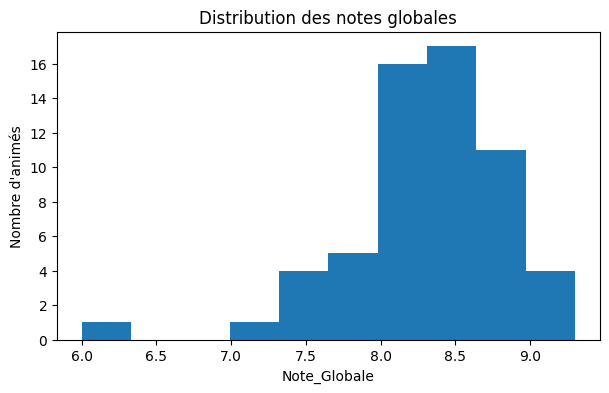

In [ ]:
plt.figure(figsize=(7,4))                 
plt.hist(df["Note_Globale"], bins=10)     
plt.xlabel("Note_Globale")                
plt.ylabel("Nombre d'animés")            
plt.title("Distribution des notes globales")  
plt.show()                                


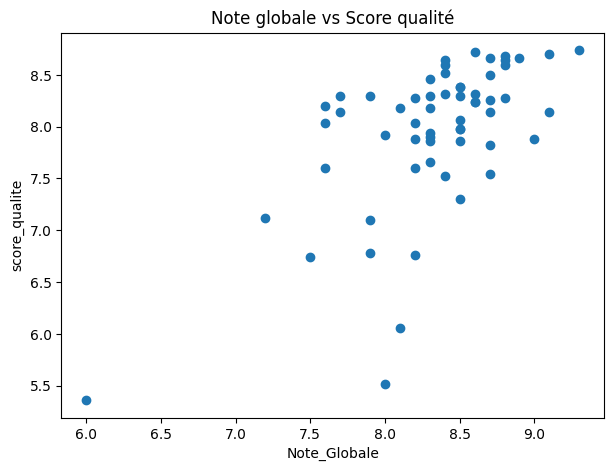

In [54]:
plt.figure(figsize=(7,5))                         
plt.scatter(df["Note_Globale"], df["score_qualite"])  
plt.xlabel("Note_Globale")                        
plt.ylabel("score_qualite")                      
plt.title("Note globale vs Score qualité")        
plt.show() 

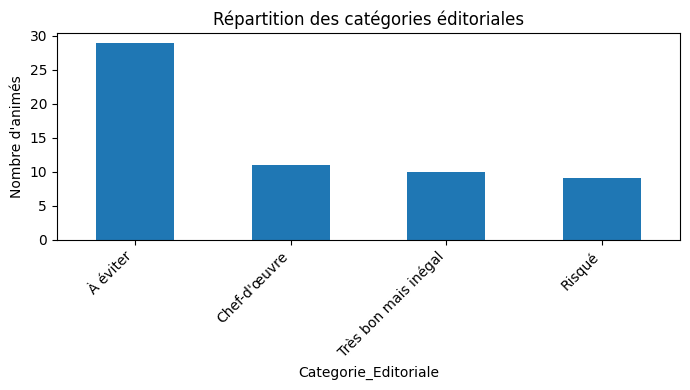

In [56]:
counts = df["Categorie_Editoriale"].value_counts()  

plt.figure(figsize=(7,4))                           
counts.plot(kind="bar")                             
plt.xlabel("Categorie_Editoriale")                  
plt.ylabel("Nombre d'animés")                       
plt.title("Répartition des catégories éditoriales") 
plt.xticks(rotation=45, ha="right")                 
plt.tight_layout()                                  
plt.show()                                          


In [61]:
df_clean = df[
    [
        "Anime",
        "Genre_Tags",
        "Studio",
        "Nb_Episodes",
        "Note_Globale",
        "Note_Meilleur_Ep",
        "Note_Pire_Ep",
        "ecart",                 
        "regularite",
        "score_qualite",
        "Categorie_Editoriale"
    ]
].copy()

df_clean.to_csv("animes_clean.csv", index=False)

df_clean


,Anime,Genre_Tags,Studio,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep,ecart,regularite,score_qualite,Categorie_Editoriale
0,Naruto,Action / Shonen,Studio Pierrot,220,8.4,9.6,5.8,3.8,6.2,7.52,À éviter
1,Trigun,Sci-Fi / Action,Madhouse,26,8.2,9.1,6.5,2.6,7.4,7.88,Risqué
2,Dragon Ball Z,Action / Shonen,Toei Animation,291,8.7,9.4,5.9,3.5,6.5,7.82,À éviter
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Bones,64,9.1,9.6,6.3,3.3,6.7,8.14,Très bon mais inégal
4,Cowboy Bebop,Sci-Fi / Noir,Sunrise,26,8.8,9.7,7.2,2.5,7.5,8.28,Très bon mais inégal
5,Sword Art Online,Isekai / Romance,A-1 Pictures,25,7.2,8.9,5.9,3.0,7.0,7.12,Risqué
6,Re:Zero,Isekai / Psychologique,White Fox,50,8.2,9.8,7.6,2.2,7.8,8.04,Très bon mais inégal
7,Dr. Stone,Sci-Fi / Adventure,TMS Entertainment,57,8.3,9.1,7.1,2.0,8.0,8.18,À éviter
8,One Piece,Adventure / Shonen,Toei Animation,1090,8.7,9.8,5.6,4.2,5.8,7.54,À éviter
9,Blue Lock,Sport / Thriller,8bit,36,8.2,9.3,6.0,3.3,6.7,7.60,À éviter


## Conclusion

Ce projet avait pour objectif d’identifier des animés à forte valeur
éditoriale à partir de données limitées.

Après une phase d’exploration et de nettoyage des données, un indicateur
de régularité a été construit afin de mesurer la stabilité de la qualité
des épisodes. Cet indicateur a ensuite été combiné à la note globale pour
former un score de qualité.

L’analyse montre que la note globale seule n’est pas suffisante pour
identifier les meilleurs animés. Le score proposé permet de mieux
distinguer les animés réellement fiables sur le plan éditorial, en
réduisant le risque lié aux fortes variations de qualité entre épisodes.

Ce score constitue ainsi un outil simple mais efficace d’aide à la
décision éditoriale.
